# Start

O primeiro passo será realizar o download dos arquivos de áudio que serão utilizados nos experimentos durante as aulas.

In [1]:
!mkdir audios

In [2]:
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/seis.wav -o audios/seis.wav
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/simple_loop.wav -o audios/simple_loop.wav
!ls audios

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 19306  100 19306    0     0  19306      0  0:00:01 --:--:--  0:00:01 22064
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 99270  100 99270    0     0  99270      0  0:00:01 --:--:--  0:00:01  117k


seis.wav
simple_loop.wav


# Jupyter Audio Basics

## Audio Libraries

Nos exemplos a seguir, usaremos principalmente duas bibliotecas para aquisição e reprodução de áudio:

### 1. librosa

[`librosa`](https://librosa.github.io/librosa/index.html) é um Python package for music and audio processing criado por [Brian McFee](https://bmcfee.github.io/). Uma grande parte foi portada para o Matlab por [Dan Ellis](http://www.ee.columbia.edu/%7Edpwe/resources/matlab/).

### 2. IPython.display.Audio

[`IPython.display.Audio`](http://ipython.org/ipython-doc/stable/api/generated/IPython.display.html#IPython.display.Audio) nos permite reproduzir áudio diretamente em um notebook IPython.

## Reading Audio

Usamos a função [`librosa.load`](https://librosa.github.io/librosa/generated/librosa.core.load.html#librosa.core.load) para carregar um arquivo de áudio em uma matriz de áudio. Retorne a matriz de áudio e a taxa de amostragem (sample rate):

In [3]:
import librosa

x, sr = librosa.load('audios/simple_loop.wav')

> Caso você receba um erro durante o `librosa.load`, garanta que o [ffmpeg](https://librosa.github.io/librosa/install.html#ffmpeg) esteja instalado.

Exibindo o comprimento da matriz de áudio e a taxa de amostragem:

In [4]:
print(x.shape)

print(sr)

(49613,)
22050


## Visualizing Audio

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

Plot do audio array com [`librosa.display.waveplot`](https://librosa.github.io/librosa/generated/librosa.display.waveplot.html#librosa.display.waveplot):

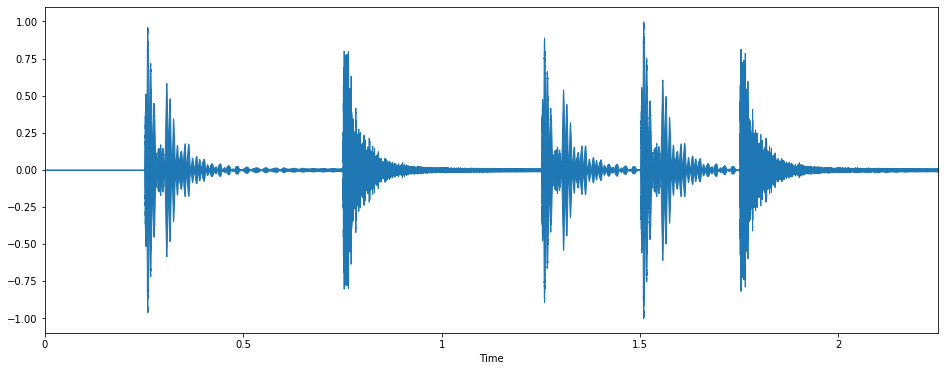

In [6]:
plt.figure(figsize=(16, 6))
librosa.display.waveplot(x, sr=sr)
plt.show()

Plot do espectrograma com [`librosa.display.specshow`](https://librosa.github.io/librosa/generated/librosa.display.specshow.html):

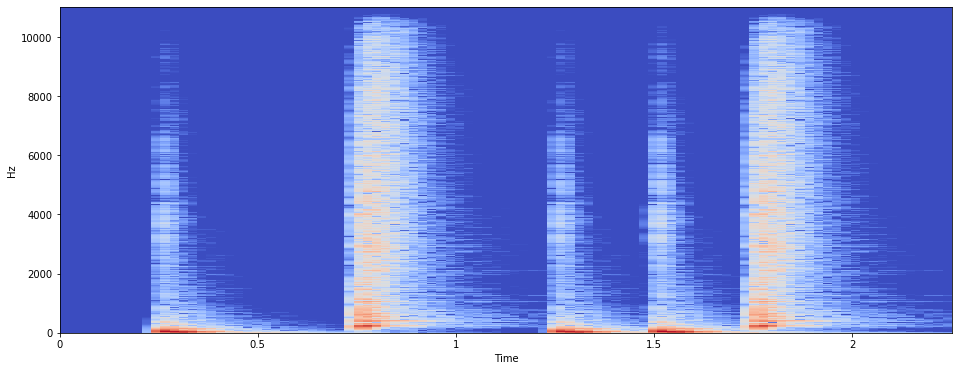

In [7]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(16, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.show()

## Playing Audio

### `IPython.display.Audio`

Utilizamos o [`IPython.display.Audio`](http://ipython.org/ipython-doc/2/api/generated/IPython.lib.display.html#IPython.lib.display.Audio), para ouvir um determinado áudio diretamente no notebook.

In [8]:
import IPython.display as ipd

ipd.Audio('audios/simple_loop.wav') # load a local WAV file

A função `IPython.display.Audio` traduz qualquer matriz, como por exemplo uma matriz NumPy. Vamos sintetizar um tom puro em 440 Hz:

In [9]:
import numpy

# sample rate
sr = 22050
# seconds
T = 2.0
# time variable
t = numpy.linspace(0, T, int(T*sr), endpoint=False)
# pure sine wave at 440 Hz
x = 0.5*numpy.sin(2*numpy.pi*440*t)

Ouvindo o áudio recém criado

In [10]:
# load a NumPy array
ipd.Audio(x, rate=sr)

## Writing Audio

Use a funcão [`librosa.output.write_wav`](https://librosa.github.io/librosa/generated/librosa.output.write_wav.html#librosa.output.write_wav) para salvar o array NumPy em um arquivo WAV.

In [11]:
librosa.output.write_wav('audios/tone_440.wav', x, sr)

## ffmpeg & ffprobe

[ffmpeg](https://www.ffmpeg.org/) is a framework to convert among different audio and video file formats.

In [12]:
!ffmpeg -version

ffmpeg version git-2020-02-09-5ad1c1a Copyright (c) 2000-2020 the FFmpeg developers
built with gcc 9.2.1 (GCC) 20200122
configuration: --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libmfx --enable-ffnvcodec --enable-cuvid --enable-d3d11va --enable-nvenc --enable-nvdec --enable-dxva2 --enable-avisynth --enable-libopenmpt --enable-amf
libavutil      56. 39.100 / 56. 

In [13]:
!ffprobe -version

ffprobe version git-2020-02-09-5ad1c1a Copyright (c) 2007-2020 the FFmpeg developers
built with gcc 9.2.1 (GCC) 20200122
configuration: --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libmfx --enable-ffnvcodec --enable-cuvid --enable-d3d11va --enable-nvenc --enable-nvdec --enable-dxva2 --enable-avisynth --enable-libopenmpt --enable-amf
libavutil      56. 39.100 / 56.

In [14]:
!ffmpeg -encoders

Encoders:
 V..... = Video
 A..... = Audio
 S..... = Subtitle
 .F.... = Frame-level multithreading
 ..S... = Slice-level multithreading
 ...X.. = Codec is experimental
 ....B. = Supports draw_horiz_band
 .....D = Supports direct rendering method 1
 ------
 V..... a64multi             Multicolor charset for Commodore 64 (codec a64_multi)
 V..... a64multi5            Multicolor charset for Commodore 64, extended with 5th color (colram) (codec a64_multi5)
 V..... alias_pix            Alias/Wavefront PIX image
 V..... amv                  AMV Video
 V..... apng                 APNG (Animated Portable Network Graphics) image
 V..... asv1                 ASUS V1
 V..... asv2                 ASUS V2
 V..X.. libaom-av1           libaom AV1 (codec av1)
 V..... avrp                 Avid 1:1 10-bit RGB Packer
 V..X.. avui                 Avid Meridien Uncompressed
 V..... ayuv                 Uncompressed packed MS 4:4:4:4
 V..... bmp                  BMP (Windows and OS/2 bitmap)
 V..... cinepak 

ffmpeg version git-2020-02-09-5ad1c1a Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9.2.1 (GCC) 20200122
  configuration: --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libmfx --enable-ffnvcodec --enable-cuvid --enable-d3d11va --enable-nvenc --enable-nvdec --enable-dxva2 --enable-avisynth --enable-libopenmpt --enable-amf
  libavutil      56. 39.100 

In [23]:
!ffprobe -i 'audios/seis.wav' -show_streams

ffprobe version git-2020-02-09-5ad1c1a Copyright (c) 2007-2020 the FFmpeg developers
  built with gcc 9.2.1 (GCC) 20200122
  configuration: --enable-gpl --enable-version3 --enable-sdl2 --enable-fontconfig --enable-gnutls --enable-iconv --enable-libass --enable-libdav1d --enable-libbluray --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libtheora --enable-libtwolame --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libzimg --enable-lzma --enable-zlib --enable-gmp --enable-libvidstab --enable-libvorbis --enable-libvo-amrwbenc --enable-libmysofa --enable-libspeex --enable-libxvid --enable-libaom --enable-libmfx --enable-ffnvcodec --enable-cuvid --enable-d3d11va --enable-nvenc --enable-nvdec --enable-dxva2 --enable-avisynth --enable-libopenmpt --enable-amf
  libavutil      56. 39.100

In [ ]:
!ffprobe -i 'audios/simple_loop.wav' -print_format 'json' -show_streams